# Problem Statement

**A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.**<br><br>
- **The company wants to know the following things about the prospective properties:**
    - Which variables are significant in predicting the price of a house.
    - How well those variables describe the price of a house.
    - The model will be used by the management to understand the pricing dynamics of a new market.

# Building Linear Model using Ridge Regression and Lasso Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
house = pd.read_csv("train.csv")

In [5]:
house.shape

(1460, 81)

In [6]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [7]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# We don't require the variable Id for the analysis as it only has unique numbers of each dwelling.

house.drop("Id", axis = 1, inplace = True)

In [10]:
# No.of.columns with missing values
house.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [11]:
(house.isnull().sum() != 0).sum()

# There are totally 19 columns which have missing values out of 81 coulumns

19

In [12]:
# missing value percentage of each column

round(100*(house.isnull().sum()/len(house.index)),2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageType        5.55
GarageCond        5.55
GarageFinish      5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
RoofMatl          0.00
Exterior1st       0.00
RoofStyle         0.00
ExterQual         0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
SalePrice         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning   

### Missing Value Treatment

In [13]:
mis_col = house.columns[house.isnull().sum() != 0]

num_mis_col = house[mis_col].select_dtypes(exclude = "object").columns

cat_mis_col = house[mis_col].select_dtypes(include = "object").columns

In [14]:
# There are 16 categorical columns which has missing values, and 3 numerical coulmn which has missing values

cat_mis_col.shape, num_mis_col.shape

((16,), (3,))

In [15]:
for i in cat_mis_col:
    print(house[i].value_counts(dropna = False), "\n")

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64 

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64 

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64 

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64 

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64 

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64 

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64 

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name:

In [16]:
# The Null values in these columns are not missing at random,The Null values here represent a seperate category that has meaning

missing_not_at_random = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                         'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [17]:
for i in missing_not_at_random:
    house[i] = house[i].replace(np.nan, "None")

In [18]:
# cross checking the imputed missing values 

for i in cat_mis_col:
    print(house[i].value_counts(dropna = False), "\n")

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64 

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64 

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64 

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64 

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64 

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64 

Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64 

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64 

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19


In [19]:
# In variable "MasVnrType" (which describes the type of Masonry)
# Here "NaN" value and "BrkCmn" occurs in low frequency, keeping them as a seperate category adds no value in model prediction
# So Imputing the null values as None category, In "MasVnrType" None category has the highest modal value

house["MasVnrType"].replace(["BrkCmn", np.nan], house["MasVnrType"].mode()[0], inplace = True) 

In [20]:
# There is only one null value, and the category "FuseP", "Mix" only occuring 3 and 1 times respectively
# so merging them with the modal value of the variable

house["Electrical"].replace(["FuseP", "Mix", np.nan], house["Electrical"].mode()[0], inplace = True)

In [21]:
# The category "Po" is occuring only 2 times which makes it a low frequency category
# so merging them with the modal value of the variable

house["BsmtCond"].replace(["Po"], house["BsmtCond"].mode()[0], inplace = True)

In [22]:
# The category "CarPort" & "2Types" is low frequency category,keeping them as a seperate category adds no value in model prediction
# so merging them with the modal value of the variable

house["GarageType"].replace(["CarPort", "2Types"], house["GarageType"].mode()[0], inplace = True)

In [23]:
# The category "Ex" & "Po" is low frequency category,keeping them as a seperate category adds no value in model prediction
# so merging them with the modal value of the variable

house["GarageQual"].replace(["Ex", "Po"], house["GarageQual"].mode()[0], inplace = True)

In [24]:
# The category "Ex", "Po" & "Gd" is low frequency category,keeping them as a seperate category adds no value in model prediction
# so merging them with the modal value of the variable

house["GarageCond"].replace(["Ex", "Po", "Gd"], house["GarageCond"].mode()[0], inplace = True)

In [25]:
house["PoolQC"].value_counts(normalize = True)

None    0.995205
Gd      0.002055
Ex      0.001370
Fa      0.001370
Name: PoolQC, dtype: float64

In [26]:
# Dropping "PoolQC" variable as it has no variation in it, 99% of the values belong to the same category,
# Which does not add any value for the model to predict anything using this variable.

house.drop("PoolQC", axis = 1, inplace = True)

In [27]:
house["MiscFeature"].value_counts(normalize = True)

None    0.963014
Shed    0.033562
Othr    0.001370
Gar2    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64

In [28]:
# Dropping "MiscFeature" variable as it has no variation in it, 96% of the values belong to the same category,
# Which does not add any value for the model to predict anything using this variable.

house.drop("MiscFeature", axis = 1, inplace = True)

In [29]:
num_mis_col

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [30]:
house[num_mis_col].describe([0.7,0.8,0.9,0.95,0.99])


,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
50%,69.000000,0.000000,1980.000000
70%,79.000000,117.000000,1999.000000
80%,85.000000,206.000000,2004.000000
90%,96.000000,335.000000,2006.000000
95%,107.000000,456.000000,2007.000000
99%,141.000000,791.920000,2009.000000


- We Can Evidently see there is a sudden jump in the values after 99th percentile in the "LotFrontage" variable, So we can drop these outliers to keep our model immune to bias.
- The variable "MasVnrArea" which describes the Masonry Veneer Area in Sq.Ft, also exhibit a suddent jump after the 99th percentile, So we can drop these outliers to keep our model immune to bias.

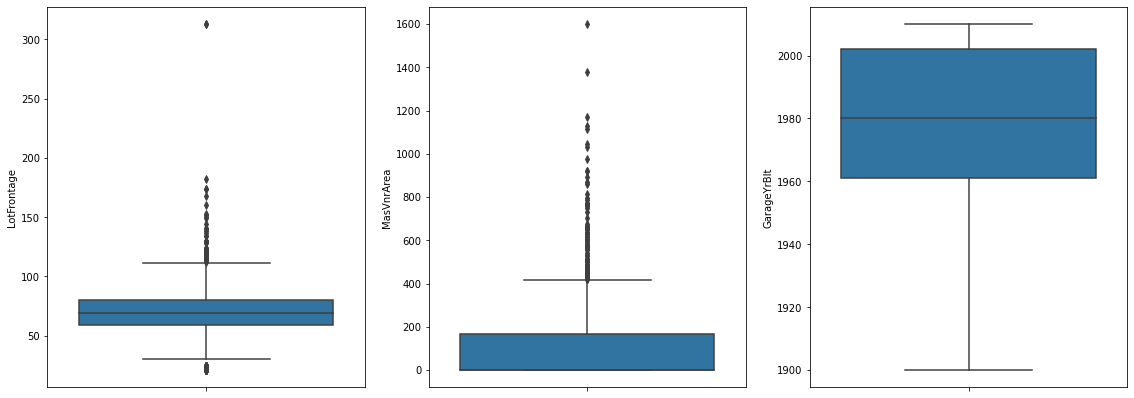

In [31]:
plt.figure(figsize = (8,7))
plt.subplots_adjust(hspace = 5, right = 2)
for i,j in enumerate(num_mis_col):
    plt.subplot(1,3, i+1)
    sns.boxplot(data = house, y = j)
plt.show()

- LotFrontage and MasVnrArea has visible outliers and have to treated.
- Variable "GarageYrBlt" has no outliers, To even get a clear picture of this variable we can extract the age of the garage

In [32]:
# As the LotFrontage variable has about 17% of missing values, imputing them will definitely induce skewness
# So filling the null values with 0 indicating there is 0 feet of the street connected to property
house["LotFrontage"].fillna(0, inplace = True)

In [33]:
# The missing values are only of 0.5% of the whole data, We can either impute them with appropriate mean/median or drop them
# As the variable "MasVrnArea" is skewed, rather than imputing them we are dropping them

(house["MasVnrArea"].isnull().sum())/len(house.index)

0.005479452054794521

In [34]:
house = house[~(house["MasVnrArea"].isnull())]

In [35]:
# cross checking the missing values in the "MasVnrArea" variable

(house["MasVnrArea"].isnull().sum())/len(house.index)

0.0

In [36]:
# The variable "GarageYrBlt" has 5.5% of missing values in it, these values are missing at random and,
# as the variable is not skewed we can either impute them with mean or median

(house["GarageYrBlt"].isnull().sum())/len(house.index)

0.05578512396694215

In [37]:
house["GarageYrBlt"] = house["GarageYrBlt"].fillna(house["GarageYrBlt"].median())

In [38]:
Lot_upper_fence = house["LotFrontage"].quantile(0.99)
Mas_upper_fence = house["MasVnrArea"].quantile(0.99)

Lot_upper_fence, Mas_upper_fence

(137.49, 791.9200000000001)

In [39]:
# Dropping these 12 rows are necessary loss for making our dataset robust for model building

house[house["LotFrontage"] > Lot_upper_fence].shape[0]

15

In [40]:
# Dropping these 15 rows are necessary loss for making our dataset robust for model building

house[house["MasVnrArea"] > Mas_upper_fence].shape[0]

15

In [41]:
house = house[~(house["LotFrontage"] > Lot_upper_fence)]

In [42]:
house = house[~(house["MasVnrArea"] > Mas_upper_fence)]

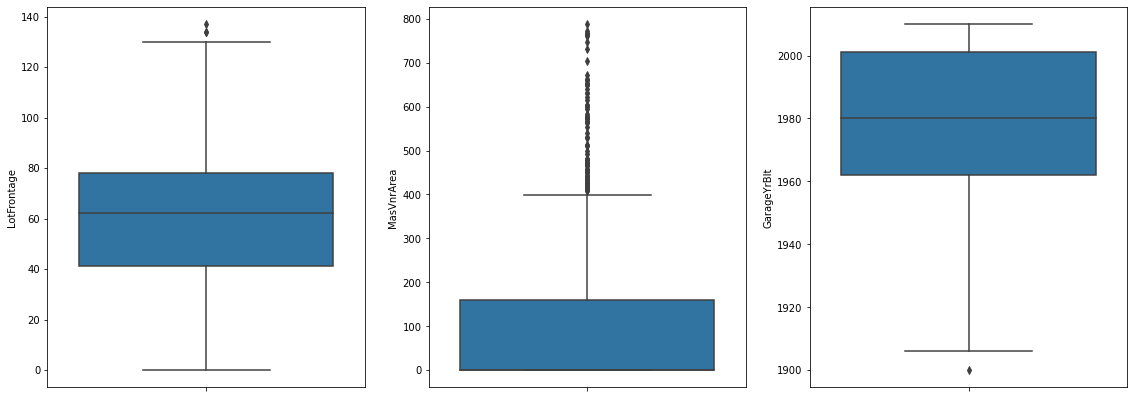

In [43]:
# cross checking the data after outlier treatment

plt.figure(figsize = (8,7))
plt.subplots_adjust(hspace = 5, right = 2)
for i,j in enumerate(num_mis_col):
    plt.subplot(1,3, i+1)
    sns.boxplot(data = house, y = j)
plt.show()

- Though still the variables "LotFrontage" & "MasVnrArea" has outliers these are continuous so these are accepted outliers. 

**There are four variables which has information about the building in years, which has to be converted as age information about the for better prediction of the price (our target variable)**

In [44]:
# Creating a columns which gives the Building's age

house["age_of_building"] = house["YrSold"] - house["YearBuilt"]

In [45]:
# Creating a columns which gives the Building's age after modification

house["building_age_after_mod"] = house["YrSold"] - house["YearRemodAdd"]

In [46]:
# Creating a columns which gives the Garage's age of the Building

house["age_of_garage"] = house["YrSold"] - house["GarageYrBlt"]

In [47]:
# Now we can drop the columns "YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold", AS we have extracted the information
# contained in this column as per our convenience.

house.drop(["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"], axis = True, inplace = True)

In [48]:
cat_col = house.select_dtypes(include = "object")

In [49]:
for i in cat_col.columns:
    print(house[i].value_counts(normalize = True, dropna = False), "\n")

RL         0.787772
RM         0.152495
FV         0.041462
RH         0.011244
C (all)    0.007027
Name: MSZoning, dtype: float64 

Pave    0.995784
Grvl    0.004216
Name: Street, dtype: float64 

None    0.939564
Grvl    0.034434
Pave    0.026001
Name: Alley, dtype: float64 

Reg    0.639494
IR1    0.330288
IR2    0.026001
IR3    0.004216
Name: LotShape, dtype: float64 

Lvl    0.900914
Bnk    0.041462
HLS    0.033029
Low    0.024596
Name: LandContour, dtype: float64 

AllPub    0.999297
NoSeWa    0.000703
Name: Utilities, dtype: float64 

Inside     0.723823
Corner     0.177091
CulDSac    0.063247
FR2        0.033029
FR3        0.002811
Name: LotConfig, dtype: float64 

Gtl    0.947997
Mod    0.043570
Sev    0.008433
Name: LandSlope, dtype: float64 

NAmes      0.154603
CollgCr    0.104708
OldTown    0.078707
Edwards    0.069571
Somerst    0.056219
Sawyer     0.052003
Gilbert    0.051300
NWAmes     0.051300
NridgHt    0.050597
SawyerW    0.040759
BrkSide    0.040056
Crawfor    0.035

In [50]:
house["LotShape"].replace("IR3", house["LotShape"].mode()[0], inplace = True)

In [51]:
house["LotConfig"].replace("FR3", house["LotConfig"].mode()[0], inplace = True)   

In [52]:
house["Neighborhood"].replace(["NPkVill","NPkVill", "Blueste"], house["Neighborhood"].mode()[0], inplace = True)   

In [53]:
house["Condition1"].replace(["PosA","RRNn", "RRNe"], house["Condition1"].mode()[0], inplace = True)   

In [54]:
house["HouseStyle"].replace("2.5Fin", house["HouseStyle"].mode()[0], inplace = True)   

In [55]:
house["RoofStyle"].replace(["Mansard","Shed"], house["RoofStyle"].mode()[0], inplace = True)   

In [56]:
house["Exterior1st"].replace(["Stone","BrkComm", "ImStucc", "AsphShn", "CBlock"], house["Exterior1st"].mode()[0], inplace = True)   

In [57]:
house["Exterior2nd"].replace(["Stone","Brk Cmn", "ImStucc", "AsphShn", "CBlock", "Other"], house["Exterior2nd"].mode()[0], inplace = True)   

In [58]:
house["ExterCond"].replace(["Ex","Po"], house["ExterCond"].mode()[0], inplace = True)   

In [59]:
house["Foundation"].replace(["Stone","Wood"], house["Foundation"].mode()[0], inplace = True)   

In [60]:
house["HeatingQC"].replace("Po", house["HeatingQC"].mode()[0], inplace = True)

In [61]:
house["Functional"].replace(["Maj2","Sev"], house["Functional"].mode()[0], inplace = True)   

In [62]:
house["SaleType"].replace(["ConLD","ConLw", "ConLI", "CWD", "Oth", "Con"], house["SaleType"].mode()[0], inplace = True)   

In [63]:
house["SaleCondition"].replace("AdjLand", house["SaleCondition"].mode()[0], inplace = True)

In [64]:
# Dropping columns having very least variation in the information it contains.
# (i.e) dropping variables which has the same information more than or equal to 95% from the total information it contains.

for i in cat_col.columns:
    if house[i].value_counts(normalize = True, dropna = False)[0] >= 0.95:
        house.drop(i, axis = 1, inplace = True)

In [65]:
num_col = house.select_dtypes(exclude = "object").columns
num_col = num_col.drop(["LotFrontage", "MasVnrArea"])
num_col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'age_of_building', 'building_age_after_mod',
       'age_of_garage'],
      dtype='object')

In [66]:
house[num_col].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,age_of_building,building_age_after_mod,age_of_garage
count,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000
mean,56.974701,10217.912157,6.065355,5.586788,432.905833,46.634575,565.846803,1045.387210,1152.247365,338.709768,5.384399,1496.341532,0.419536,0.057625,1.553057,0.378074,2.860155,1.047084,6.485594,0.600843,1.754743,469.272663,93.876318,46.269150,21.828531,3.498243,15.313422,1.743500,44.619817,177993.122277,36.945186,23.206606,29.499649
std,42.488114,8275.241695,1.355025,1.119144,427.847896,161.513473,439.944219,410.436911,366.330080,427.183644,46.501249,491.559994,0.514581,0.239072,0.544596,0.502172,0.816139,0.221625,1.600689,0.637152,0.744131,210.984339,125.298373,65.778086,59.822453,29.691069,56.217794,33.136119,502.485822,73996.212401,30.265558,20.672438,24.002340
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,219.500000,794.000000,882.000000,0.000000,0.000000,1125.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129250.000000,8.000000,4.000000,7.000000
50%,50.000000,9400.000000,6.000000,5.000000,378.000000,0.000000,481.000000,988.000000,1080.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,476.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160200.000000,36.000000,15.000000,28.000000
75%,70.000000,11425.500000,7.000000,6.000000,701.000000,0.000000,808.000000,1279.500000,1379.500000,720.000000,0.000000,1766.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,211000.000000,55.000000,42.000000,46.000000
max,190.000000,164660.000000,10.000000,9.000000,2260.000000,1474.000000,2153.000000,3206.000000,3228.000000,1818.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1390.000000,857.000000,547.000000,386.000000,508.000000,480.000000,738.000000,15500.000000,611657.000000,136.000000,60.000000,107.000000


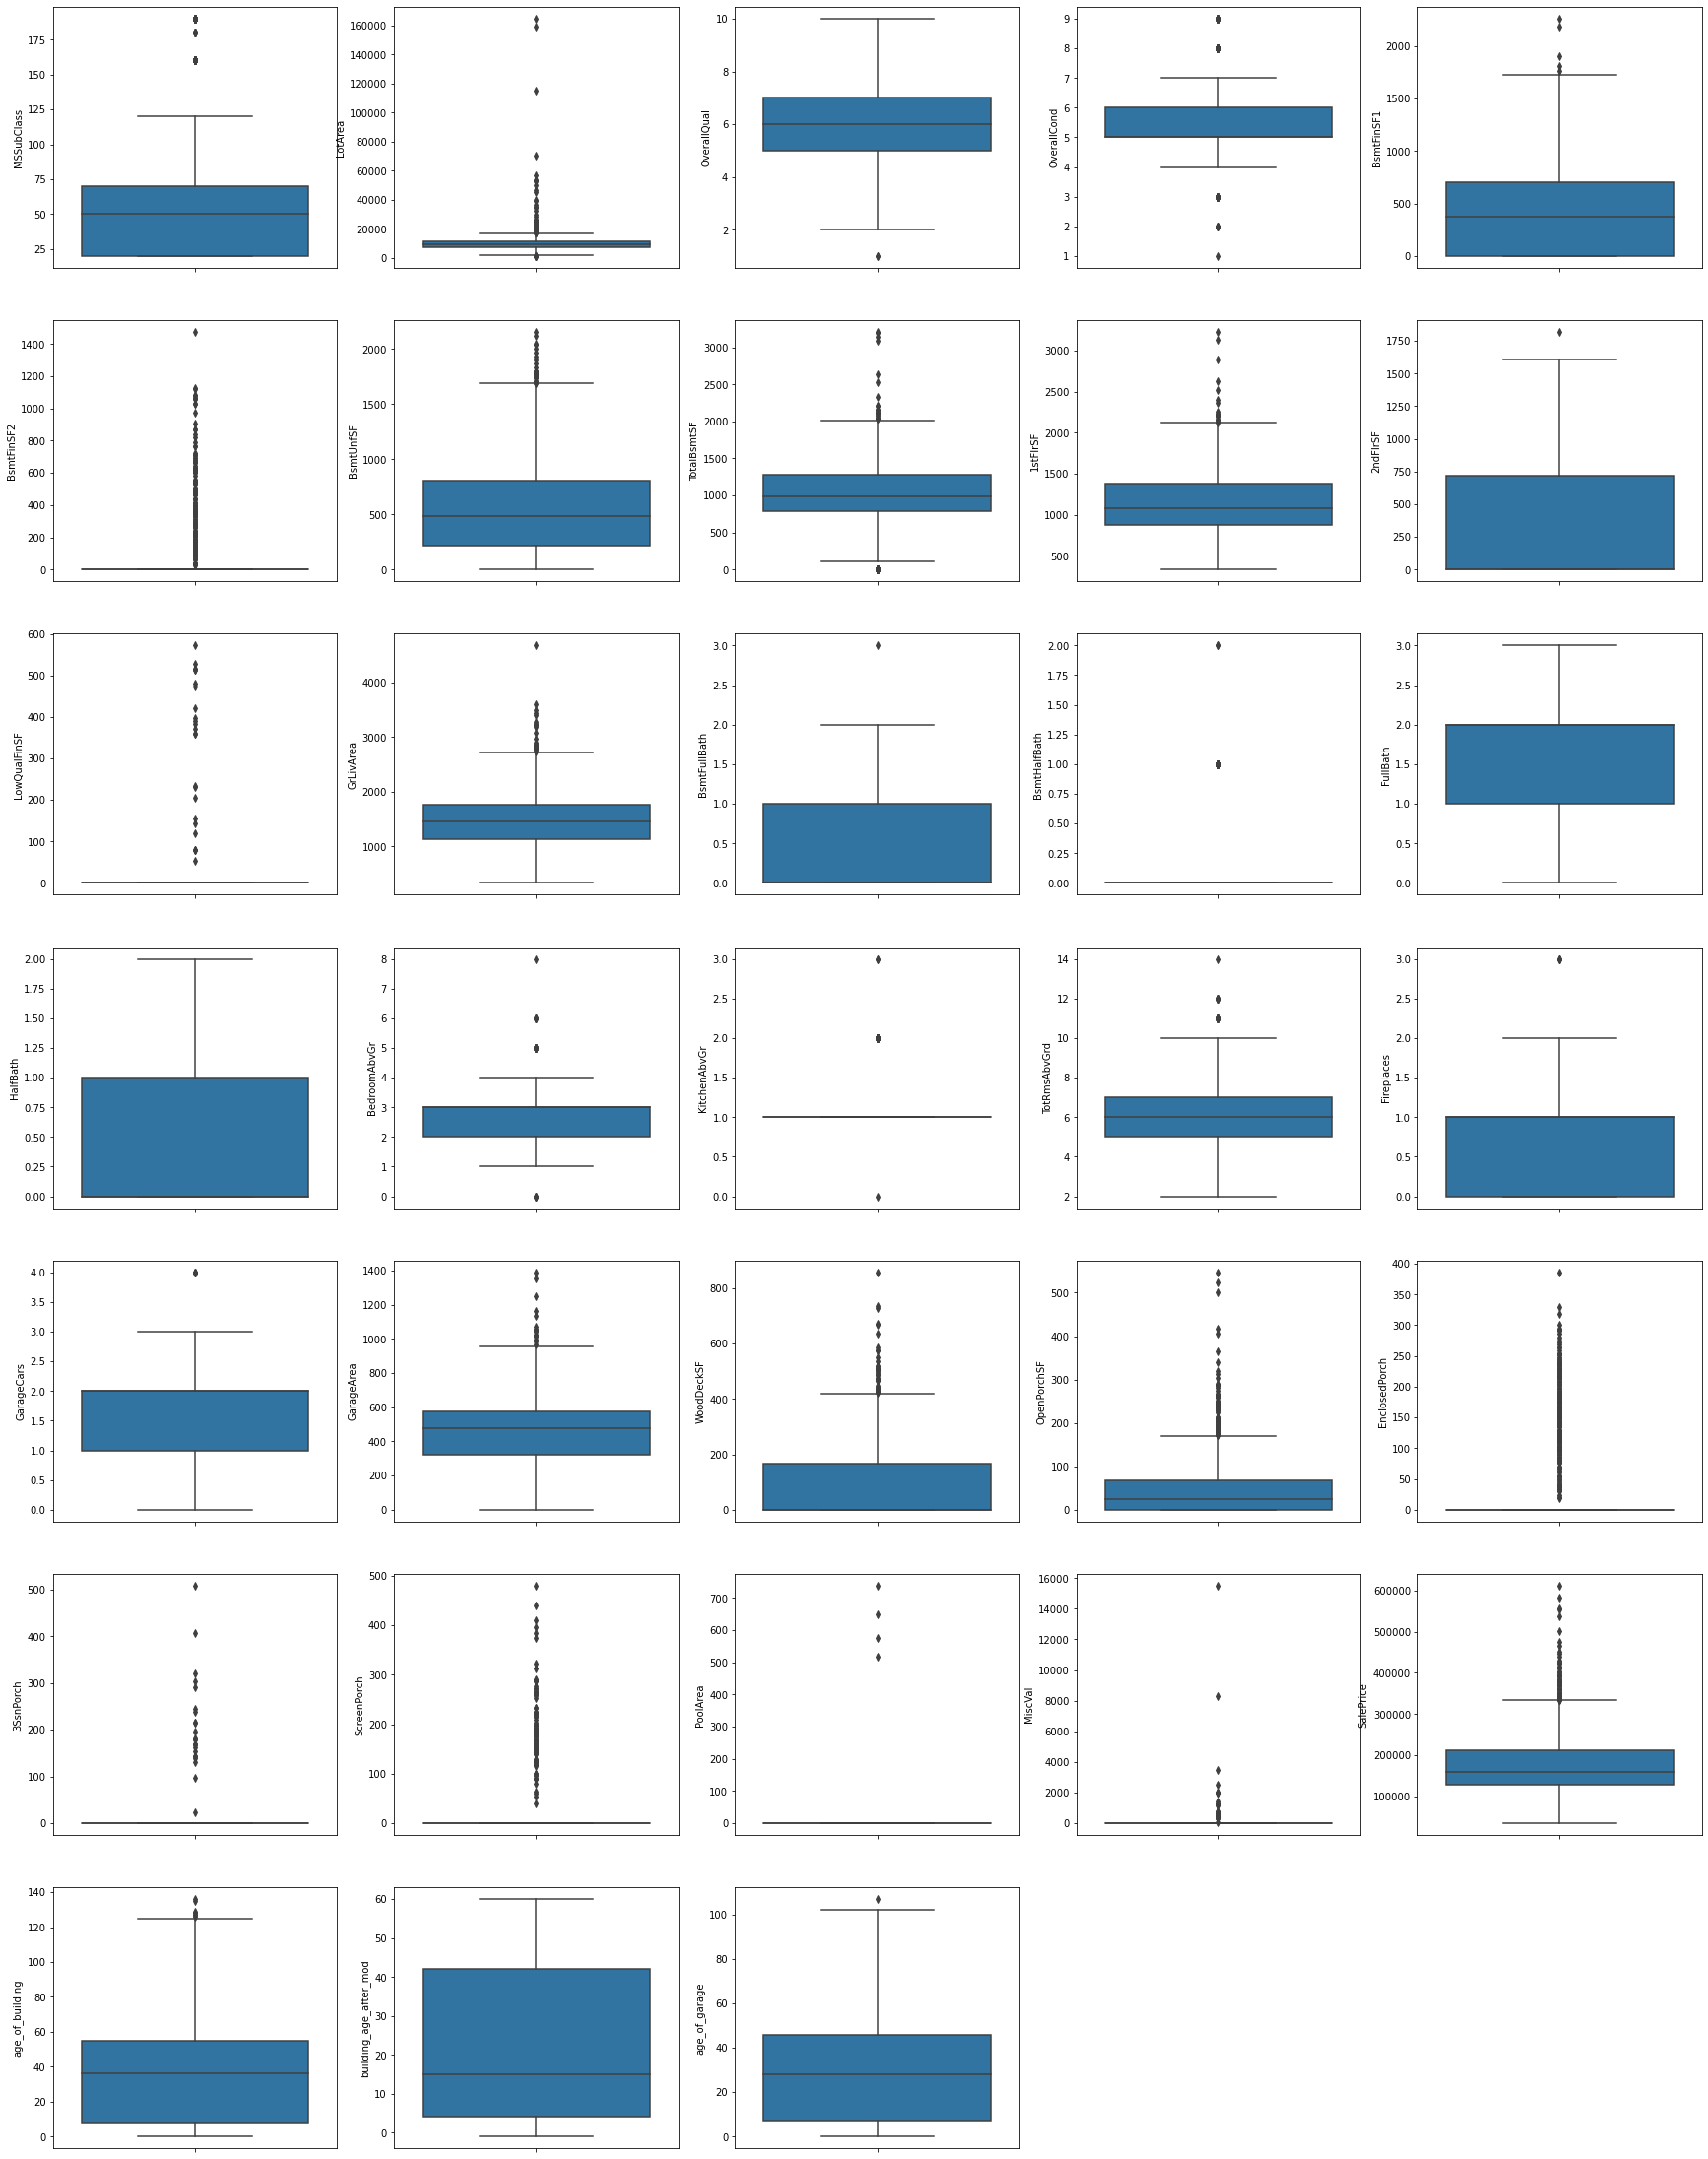

In [67]:
plt.figure(figsize = (30,40))
for i in enumerate(num_col):
    plt.subplot(7,5,i[0]+1)
    sns.boxplot(y = house[i[1]])
plt.show()

In [68]:
num_outlier_col = ["BsmtHalfBath", "KitchenAbvGr", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
house[num_outlier_col].describe([0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.99])

,BsmtHalfBath,KitchenAbvGr,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000
mean,0.057625,1.047084,21.828531,3.498243,15.313422,1.743500,44.619817
std,0.239072,0.221625,59.822453,29.691069,56.217794,33.136119,502.485822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,1.000000,112.000000,0.000000,0.000000,0.000000,0.000000
91%,0.000000,1.000000,116.000000,0.000000,0.000000,0.000000,0.000000
92%,0.000000,1.000000,129.240000,0.000000,43.120000,0.000000,0.000000
93%,0.000000,1.000000,146.380000,0.000000,120.000000,0.000000,0.000000


- 94% of the variable "BsmtHalfBath" (Basement half bathrooms) has no half bathrooms in them, So the variation (information) from this dataset is very trivial for making decisions based on this column, so we can take a call and drop them.
- 94% of the variable "KitchenAbvGr" (Kitchens above grade) has the value of 1 in them, So the variation (information) from this dataset is very trivial for making decisions based on this column, so we can take a call and drop them.
- 90% of the variable "EnclosedPorch" (Enclosed porch area in square feet) has no area of Enclosed Porch in them, but there seems there is no suddent jump after 90th percentile till 100th percentile which indicates that these are outliers but these have to be taken into account rather than dropping them.
- 94% of the variable "3SsnPorch" (Three season porch area in square feet) has no area of Three season porch in them, So the variation (information) from this dataset is very trivial for making decisions based on this column, so we can take a call and drop them.
- 90% of the variable "ScreenPorch" (Screen porch area in square feet) has no area of Screen Porch in them, but there seems there is no suddent jump after 90th percentile till 100th percentile which indicates that these are outliers but these have to be taken into account rather than dropping them.
- 99% of the variable "PoolArea" (Pool area in square feet) has no pool in them, So the variation (information) from this dataset is very trivial for making decisions based on this column, so we can take a call and drop them.
- 96% of the variable "MiscVal" (Value of miscellaneous features in dollars) has no 0 miscellaneous value, but there seems there is no suddent jump after 96th percentile till 100th percentile which indicates that these are outliers but these have to be taken into account rather than dropping them.

In [69]:
# Dropping the features which has very trivial variation(information) contained in them

house.drop(["BsmtHalfBath", "KitchenAbvGr", "3SsnPorch", "PoolArea"], axis = 1, inplace = True)

In [70]:
# LotArea has a sudden jump ater 99.8th percentile this is clear sign of outlier 
# and have to be droped to make the data without skewness.

house["LotArea"].describe([0.92,0.94,0.96,0.98,0.99,0.998])

count      1423.000000
mean      10217.912157
std        8275.241695
min        1300.000000
50%        9400.000000
92%       14786.280000
94%       16125.640000
96%       17507.680000
98%       22716.800000
99%       35026.740000
99.8%     77685.528000
max      164660.000000
Name: LotArea, dtype: float64

In [71]:
house = house[~(house["LotArea"] > house["LotArea"].quantile(0.998))]

In [72]:
house.shape

(1420, 67)

## Univariate and Bivarite analysis

In [73]:
# There is a huge difference in the mean and median which indicates that there may be a skewness in the data

house["SalePrice"].describe()

count      1420.000000
mean     177800.185211
std       73941.891778
min       34900.000000
25%      129000.000000
50%      160000.000000
75%      210000.000000
max      611657.000000
Name: SalePrice, dtype: float64

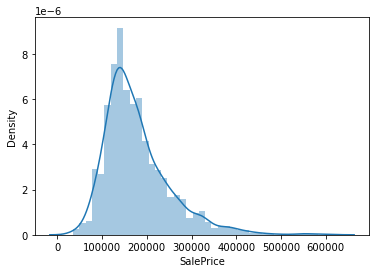

In [74]:
# Checking the assumption of Linear Regression - that the target variable is Normally distributed

sns.distplot(house["SalePrice"])
plt.show()

- It is evident that the target variable is not a normally distributed curve, But a right skewed distribution
- To satisfiy the assumptions of the Linear Regression we will convert the "SalesPrice" variable to log("SalesPrice") so that we can achieve a target variable which is of the form normally distributed.

In [75]:
house["log(SalePrice)"] = np.log(house["SalePrice"])

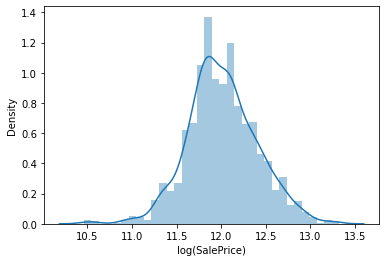

In [76]:
sns.distplot(house["log(SalePrice)"])
plt.show()

In [77]:
house.drop("SalePrice", axis = 1, inplace = True)

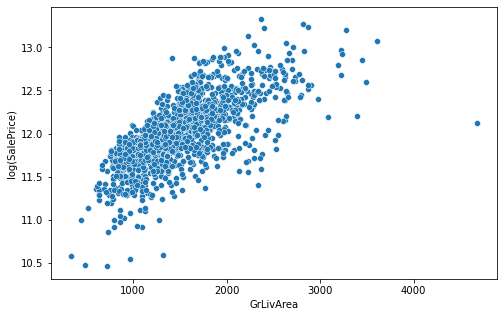

In [78]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = house, x = "GrLivArea", y = "log(SalePrice)")
plt.show()

- There is a good relationship as the living area (above the ground) increase the Price of the house aslo increases, But we can't conclude this a linear or non linear relationship from this scatterplot.

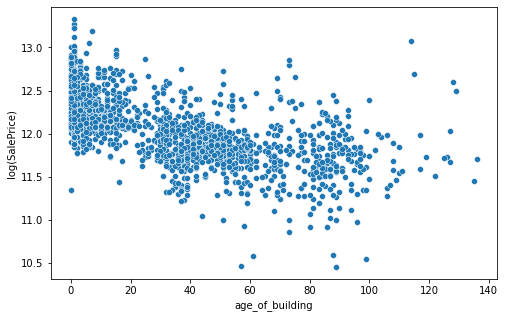

In [79]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = house, x = "age_of_building", y = "log(SalePrice)")
plt.show()

- We can visualize a good sign of decrease in the price amount of the house as the age of the building increases

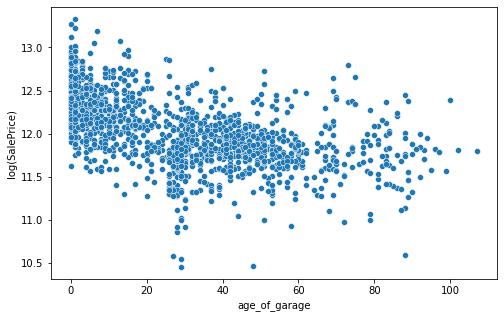

In [80]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = house, x = "age_of_garage", y = "log(SalePrice)")
plt.show()

- We could observe a very gradual decrease in the price of the house as the age of the garage increases.

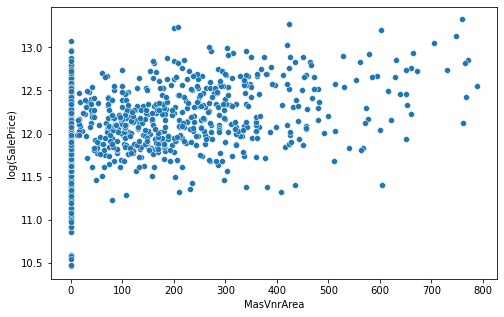

In [81]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = house, x = "MasVnrArea", y = "log(SalePrice)")
plt.show()

- The strip of data points at 0 indicates that most of the buildings have no Masonry Veneer Area, But apart from that we can ovserve a very gradual increase in the price as the Masonry Veneer Area increases

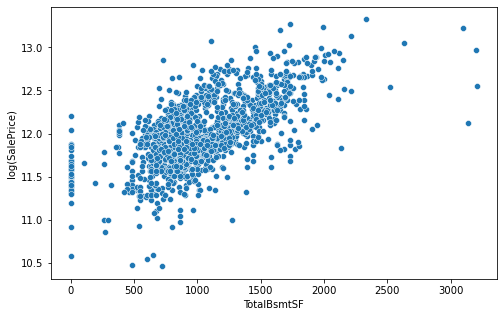

In [82]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = house, x = "TotalBsmtSF", y = "log(SalePrice)")
plt.show()

- The strip of data points at 0 indicates that there are which have buildings have no basement area, But apart from that we can ovserve a very gradual increase in the price as the basement area increases

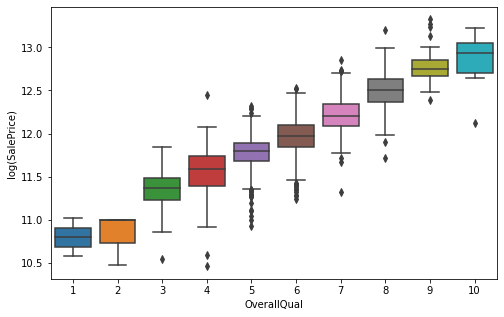

In [83]:
plt.figure(figsize = (8,5))
sns.boxplot(data = house, x = "OverallQual", y = "log(SalePrice)")
plt.show()

- this is a clear sign of linear relationship, as the ranking of Overall Quality increases the price of the house also increases

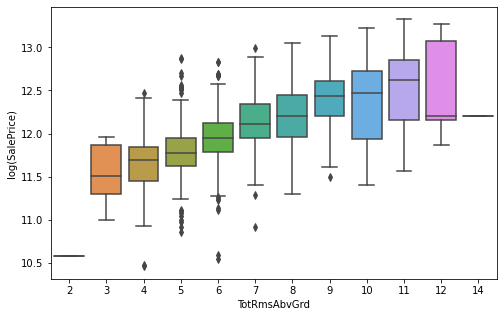

In [84]:
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
plt.figure(figsize = (8,5))
sns.boxplot(data = house, x = "TotRmsAbvGrd", y = "log(SalePrice)")
plt.show()

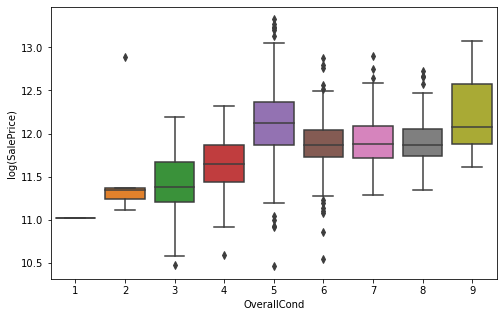

In [85]:
plt.figure(figsize = (8,5))
sns.boxplot(data = house, x = "OverallCond", y = "log(SalePrice)")
plt.show()

- There is a graduall increase in the price amount till there is an increase in the Overall Condition ranking but after the cap of 5 there isn't much difference in the price of the building till the rank is 8

In [86]:
corrmat = house.corr()
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,age_of_building,building_age_after_mod,age_of_garage,log(SalePrice)
MSSubClass,1.000000,-0.218996,-0.281027,0.040747,-0.062032,0.013304,-0.075524,-0.066557,-0.137686,-0.252602,-0.258638,0.312807,0.048430,0.083988,0.002732,0.137710,0.172179,-0.022712,0.045744,-0.045688,-0.040029,-0.099364,-0.017422,-0.005111,-0.013669,-0.026749,-0.010784,-0.027952,-0.042322,-0.083973,-0.074443
LotFrontage,-0.218996,1.000000,0.105366,0.145331,-0.050301,0.079355,0.000669,-0.015688,0.180925,0.188646,0.191393,0.012199,0.023326,0.155292,-0.024138,0.103225,-0.023284,0.139047,0.190167,0.010531,0.159775,0.180616,-0.018671,0.048986,0.018626,0.036397,-0.058783,-0.028197,-0.066926,-0.040151,0.158341
LotArea,-0.281027,0.105366,1.000000,0.147713,-0.008206,0.120773,0.196963,0.084149,0.041148,0.282402,0.360766,0.090935,-0.004445,0.347197,0.119447,0.143764,0.080067,0.184372,0.283924,0.293918,0.249549,0.278685,0.225821,0.151135,-0.026110,0.113885,0.034069,-0.038953,-0.027612,0.003170,0.343799
OverallQual,0.040747,0.145331,0.147713,1.000000,-0.086576,0.404630,0.210584,-0.055540,0.310533,0.530590,0.457939,0.275528,-0.032879,0.577319,0.102412,0.541550,0.266656,0.090452,0.412018,0.389367,0.592319,0.545001,0.232969,0.308944,-0.126366,0.072584,-0.029488,-0.570639,-0.550202,-0.514042,0.815487
OverallCond,-0.062032,-0.050301,-0.008206,-0.086576,1.000000,-0.130616,-0.038799,0.040537,-0.136670,-0.171073,-0.143878,0.035864,0.031720,-0.072925,-0.050345,-0.192220,-0.057914,0.012802,-0.055522,-0.016310,-0.183828,-0.147801,-0.006546,-0.032025,0.085945,0.054201,0.067299,0.379835,-0.073228,0.309078,-0.030243
MasVnrArea,0.013304,0.079355,0.120773,0.404630,-0.130616,1.000000,0.251519,-0.068044,0.107967,0.350937,0.336524,0.128305,-0.071287,0.355310,0.096476,0.259691,0.195208,0.094690,0.275951,0.230690,0.368673,0.372676,0.157551,0.151874,-0.117527,0.066746,-0.031235,-0.325092,-0.176261,-0.250750,0.422694
BsmtFinSF1,-0.075524,0.000669,0.196963,0.210584,-0.038799,0.251519,1.000000,-0.054413,-0.522551,0.459140,0.384323,-0.180359,-0.073971,0.122301,0.653938,0.035200,-0.009816,-0.128150,0.002774,0.221441,0.219812,0.263737,0.197887,0.082080,-0.118520,0.073966,0.004068,-0.255428,-0.121880,-0.150535,0.373176
BsmtFinSF2,-0.066557,-0.015688,0.084149,-0.055540,0.040537,-0.068044,-0.054413,1.000000,-0.211102,0.110864,0.101948,-0.099759,-0.008185,-0.011608,0.155861,-0.081267,-0.024910,-0.016034,-0.041991,0.044500,-0.031286,-0.011153,0.072716,0.010139,0.034056,0.090931,0.004552,0.043898,0.064267,0.084151,0.004657
BsmtUnfSF,-0.137686,0.180925,0.041148,0.310533,-0.136670,0.107967,-0.522551,-0.211102,1.000000,0.445692,0.335133,-0.002356,0.029664,0.250242,-0.419264,0.287754,-0.044978,0.168776,0.249930,0.053169,0.213943,0.184166,-0.007526,0.132928,0.001266,-0.010826,-0.023320,-0.146618,-0.183907,-0.182064,0.223334
TotalBsmtSF,-0.252602,0.188646,0.282402,0.530590,-0.171073,0.350937,0.459140,0.110864,0.445692,1.000000,0.799952,-0.229640,-0.048420,0.391283,0.292477,0.313389,-0.068298,0.041339,0.254516,0.305166,0.446116,0.467837,0.226632,0.232094,-0.108634,0.101233,-0.018993,-0.405994,-0.298918,-0.318943,0.630049


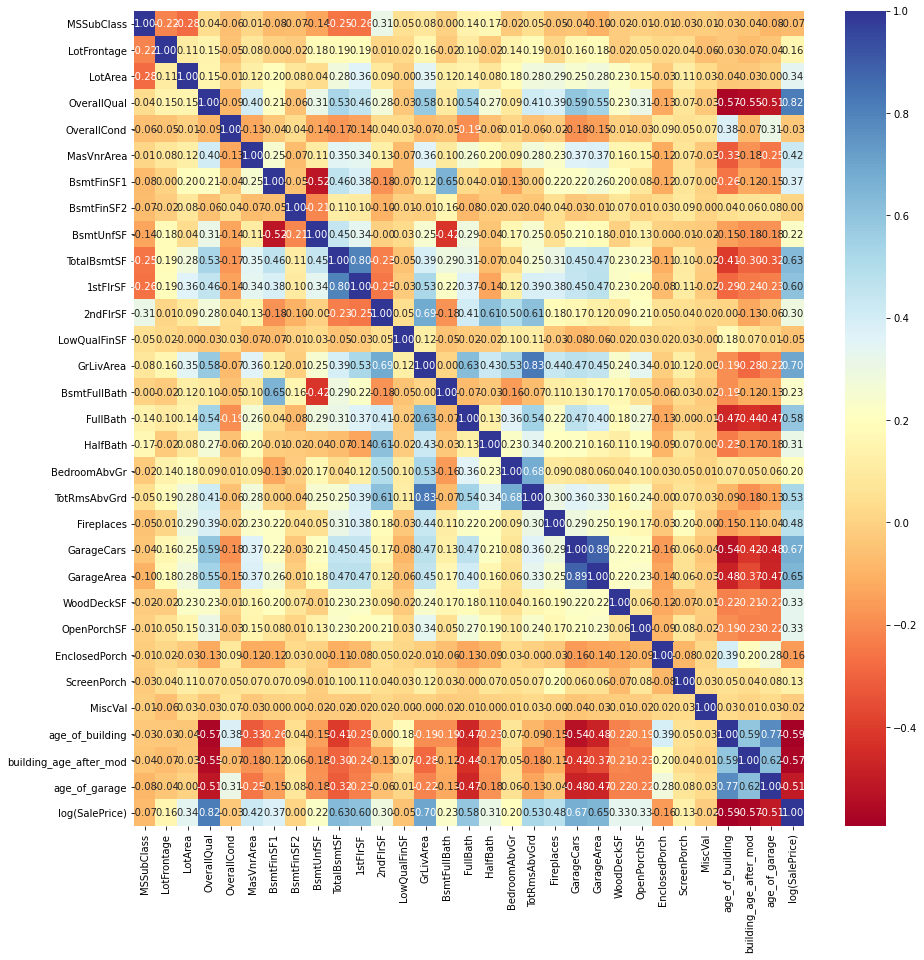

In [87]:
# Red and blue colors are the indicators of negative and positive correlation resprctively.

f, ax = plt.subplots(figsize= (15, 15))
sns.heatmap(corrmat, cmap = "RdYlBu", annot = True, fmt = "0.2f")
plt.show()

- correlation coefficients only captures Linear Relationship between the variables.

- The variable "GarageCars" which describes Size of garage in car capacity has collineariy with the variable "GarageArea" which describes Size of garage in square feet with a correlation coefficient of 0.89, Which can be read as 89% of the variance in one variable is explained by the other variable.

- The variable "TotRmsAbvGrd" which describes the total rooms above grade (does not include bathrooms) has collineariy with the variable "GrLivArea" which describes living area Above ground with a correlation coefficient of 0.83, Which can be read as 83% of the variance in one variable is explained by the other variable.

- The variable "1stFlrSF" which describes the First Floor area has collineariy with the variable "TotalBsmtSF" which describes basement area with a correlation coefficient of 0.80, Which can be read as 80% of the variance in one variable is explained by the other variable.

- So we can drop them to make our model robust.

In [88]:
house.drop(["TotRmsAbvGrd", "GarageCars", "1stFlrSF"], axis = 1, inplace = True)

#### Checking the datatypes of all the variabels

In [89]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MSSubClass              1420 non-null   int64  
 1   MSZoning                1420 non-null   object 
 2   LotFrontage             1420 non-null   float64
 3   LotArea                 1420 non-null   int64  
 4   Alley                   1420 non-null   object 
 5   LotShape                1420 non-null   object 
 6   LandContour             1420 non-null   object 
 7   LotConfig               1420 non-null   object 
 8   LandSlope               1420 non-null   object 
 9   Neighborhood            1420 non-null   object 
 10  Condition1              1420 non-null   object 
 11  BldgType                1420 non-null   object 
 12  HouseStyle              1420 non-null   object 
 13  OverallQual             1420 non-null   int64  
 14  OverallCond             1420 non-null   

In [90]:
# As the variables "MSSubClass" describes the type of dwelling involved in the sale,
# We can convert the variable from int to object datatype

house["MSSubClass"] = house["MSSubClass"].astype("object")

In [91]:
# As the variables "OverallQual" & "OverallCond" just allots a rank to the dwelling involved in the sale,
# We can convert the variable from int to object datatype

house["OverallQual"] = house["OverallQual"].astype("object")
house["OverallCond"] = house["OverallCond"].astype("object")

### Creating Dummy Variables

In [92]:
dum_col = house.select_dtypes(include = "object").columns
dummy = pd.get_dummies(house[dum_col], drop_first = True)

In [93]:
dummy.shape

(1420, 180)

In [94]:
house = pd.concat([house, dummy], axis = 1)

In [95]:
house.drop(dum_col, axis = 1, inplace = True)

In [96]:
house.shape

(1420, 205)

# Model Building

In [97]:
house.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,age_of_building,building_age_after_mod,age_of_garage,log(SalePrice),MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_None,GarageQual_TA,GarageCond_None,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,854,0,1710,1,2,1,3,0,548,0,61,0,0,0,5,5,5.0,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,0,0,1262,0,2,0,3,1,460,298,0,0,0,0,31,31,31.0,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0

#### creating train and test data

In [98]:
X = house.drop("log(SalePrice)", axis = 1)
y = house["log(SalePrice)"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [100]:
X_train.shape

(994, 204)

#### Scaling the variables

In [101]:
# As Ridge and Lasso gives a penalty based on the magnitude of the coefficients of the Betas, We definitely have to scale
# all the variabels before building the model on top of that

scaler = MinMaxScaler()

In [102]:
scale_var = X_train.select_dtypes(include = ["float64", "int64"]).columns

X_train[scale_var] = scaler.fit_transform(X_train[scale_var])

In [103]:
# The Min and Max values shows that all the variables are scalled under a common scale
# The dataset is perfect for Model Building

X_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,age_of_building,building_age_after_mod,age_of_garage,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_None,GarageQual_TA,GarageCond_None,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,99

## Linear Regression

**Creating a Linear Regression Model to check whether a Linear Model is enough to find the relation or the data is Non Linearly related to the target variable and a regularization is required for the data or not.**

In [104]:
lr = LinearRegression()

##### Coarse Tuning using RFE

In [105]:
rfe = RFE(lr, 25)

In [106]:
rfe = rfe.fit(X_train, y_train)

In [107]:
col_list = X_train.columns[rfe.support_]
col_list

Index(['GrLivArea', 'MSSubClass_90', 'BldgType_Duplex', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'BsmtQual_None', 'BsmtExposure_None', 'GarageType_None',
       'GarageFinish_None', 'GarageQual_None'],
      dtype='object')

In [108]:
lr.fit(X_train[col_list], y_train)

LinearRegression()

In [109]:
# Predicting the train values with the Linear Regression Model

y_train_pred = lr.predict(X_train[col_list])

In [110]:
residuals = y_train - y_train_pred

#### Validating the assumptions of the Linear Regression

-  **Checking normally distributed residuals.**

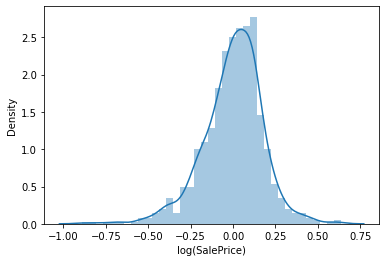

In [111]:
# Checking whether the error terms are normally distributed with mean 0

sns.distplot(residuals)
plt.show()

the model shows very good picture of the **normally distributed residuals with mean 0 and standard deviation sigma.**

-  **Checking for Homoscedasticity**

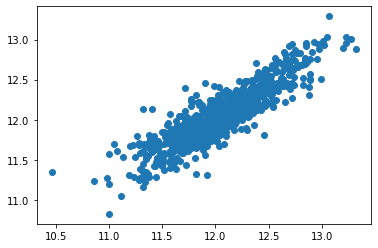

In [112]:
plt.scatter(y_train, y_train_pred)
plt.show()

- **The residual terms show a fair constant variance and They are independent of each other**
- **If the errors are not independent, It may be the reason of Multicollinearity between variables then the estimates of the error standard deviation will be biased, potentially leading to improper inferences about the process**
- **In such a situatio the dataset requires regularization to continue with a Linear Model**

## Ridge Regression

In [113]:
ridge_base = Ridge()

In [114]:
# Selecting the optimum lambda value for the Ridge Regression using GridSearchCV

params = {"alpha" : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200,500]}

In [115]:
ridge_grid = GridSearchCV(estimator = ridge_base, param_grid = params, cv = 4, n_jobs = -1, verbose = 1,
                          return_train_score = True, scoring = "neg_mean_absolute_error")

In [116]:
ridge_grid.fit(X_train, y_train)

Fitting 4 folds for each of 28 candidates, totalling 112 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:   10.2s finished


GridSearchCV(cv=4, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [117]:
# The best value of alpha is 3

ridge_grid.best_estimator_

Ridge(alpha=2.0)

In [118]:
ridge_df = pd.DataFrame(ridge_grid.cv_results_)
ridge_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.046879,0.015626,0.011721,0.006767,0.0001,{'alpha': 0.0001},-0.096498,-0.094951,-0.095417,-0.082892,-0.092440,0.005541,23,-0.061049,-0.063226,-0.063823,-0.064414,-0.063128,0.001272
1,0.031252,0.000006,0.015624,0.000004,0.001,{'alpha': 0.001},-0.096476,-0.094942,-0.095380,-0.082875,-0.092418,0.005538,22,-0.061046,-0.063226,-0.063822,-0.064413,-0.063127,0.001272
2,0.027344,0.006769,0.015626,0.000003,0.01,{'alpha': 0.01},-0.096263,-0.094853,-0.095026,-0.082711,-0.092213,0.005513,20,-0.061019,-0.063220,-0.063809,-0.064403,-0.063113,0.001279
3,0.035387,0.009684,0.029539,0.014120,0.05,{'alpha': 0.05},-0.095446,-0.094511,-0.093692,-0.082232,-0.091470,0.005370,18,-0.060949,-0.063205,-0.063788,-0.064353,-0.063074,0.001292
4,0.046880,0.011049,0.011719,0.012956,0.1,{'alpha': 0.1},-0.094630,-0.094172,-0.092410,-0.081803,-0.090754,0.005234,17,-0.060983,-0.063209,-0.063840,-0.064332,-0.063091,0.001281


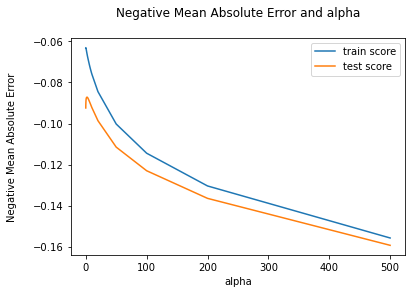

In [119]:
# visualizing the mean train scores and mean test scores with respect to the lambda value


ridge_df['param_alpha'] = ridge_df['param_alpha'].astype('float32')


plt.plot(ridge_df['param_alpha'], ridge_df['mean_train_score'])
plt.plot(ridge_df['param_alpha'], ridge_df['mean_test_score'])

plt.xlabel('alpha\n')
plt.ylabel('Negative Mean Absolute Error\n')

plt.title("Negative Mean Absolute Error and alpha\n")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

- As the lambda value increases the Negative mean Absolute error decreases, The negative error as close to 0 should be maintained

##### Developing Ridge Regression with the optimal value of lambda with 3

In [120]:
ridge = Ridge(alpha = 3)
ridge.fit(X_train, y_train)

Ridge(alpha=3)

In [121]:
ridge_coef_df = pd.DataFrame(X_train.columns, columns = ["Variable Name"])
ridge_coef_df["Ridge Coefficients"] = ridge.coef_
ridge_coef_df["Ridge Coefficients"] = round(ridge_coef_df["Ridge Coefficients"], 3)

ridge_coef_df.sort_values(by = "Ridge Coefficients", ascending = False)

,Variable Name,Ridge Coefficients
9,GrLivArea,0.411
6,TotalBsmtSF,0.265
3,BsmtFinSF1,0.204
1,LotArea,0.202
98,OverallQual_9,0.148
15,GarageArea,0.148
99,OverallQual_10,0.131
7,2ndFlrSF,0.127
5,BsmtUnfSF,0.125
11,FullBath,0.114


- As Ridge Regression implies penalty and tend towards 0 but never gets exactly to 0, all the variables will have their respective coefficients which helds us from Feature selection, Thus in Ridge Regression we have to consider all the variables in our final model.

In [122]:
# Predicting the value using the Ridge Regression

ridge_y_train_pred = ridge.predict(X_train)

In [123]:
# Evaluating the Ridge Regression Model in train dataset

print("r2 value -->", r2_score(y_train, ridge_y_train_pred))
print("RMSE value -->", mean_squared_error(y_train, ridge_y_train_pred))

r2 value --> 0.9355740554158566
RMSE value --> 0.00950223286064701


- RMSE value indicates the predicted model can vary only upto a value of 0.0095 either positively or negatively, which is really a good for a Model

##### Preparing test dataset

In [124]:
X_train_col = X_train.columns
X_test = X_test[X_train_col]

In [125]:
X_test[scale_var] = scaler.transform(X_test[scale_var])

In [126]:
X_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,age_of_building,building_age_after_mod,age_of_garage,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_None,GarageQual_TA,GarageCond_None,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.00000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426

-  The **Min and Max** values are **around 0 and 1** respectively, the **reason** behind this is the **MinMaxScaler have scaled them using the Min and Max value it learned from the training data**.

#### Predicting using Ridge Regression

In [127]:
# Predicting the value using the Ridge Regression

ridge_y_test_pred = ridge.predict(X_test)

In [128]:
# Evaluating the Ridge Regression Model

print("r2 value -->", r2_score(y_test, ridge_y_test_pred))
print("RMSE value -->", mean_squared_error(y_test, ridge_y_test_pred))

r2 value --> 0.8724291442717493
RMSE value --> 0.020309099516850327


- RMSE value indicates the predicted model can vary only upto a value of 0.020 either positively or negatively, which is really a good for a Model

## Lasso Regression

In [129]:
lasso_base = Lasso()

In [130]:
# Selecting the optimum lambda value for the Ridge Regression using GridSearchCV

params = {"alpha" : [0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.01,0.1,0.2]}

In [131]:
lasso_grid = GridSearchCV(estimator = lasso_base, param_grid = params, cv = 4, n_jobs = -1, verbose = 1,
                          return_train_score = True, scoring = "neg_mean_absolute_error")

In [132]:
lasso_grid.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    2.4s finished


GridSearchCV(cv=4, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.01, 0.1, 0.2]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
# The best value of alpha is 0.0003

lasso_grid.best_estimator_

Lasso(alpha=0.0003)

In [134]:
lasso_df = pd.DataFrame(lasso_grid.cv_results_)
lasso_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.268639,0.083076,0.011818,0.006825,0.0001,{'alpha': 0.0001},-0.088292,-0.089348,-0.083494,-0.078164,-0.084824,0.004433,5,-0.061829,-0.063592,-0.064753,-0.064999,-0.063793,0.001252
1,0.122131,0.038681,0.015721,0.000165,0.0002,{'alpha': 0.0002},-0.086290,-0.087529,-0.080654,-0.077129,-0.082900,0.004221,4,-0.063666,-0.064167,-0.066045,-0.065498,-0.064844,0.000964
2,0.078223,0.011176,0.015627,0.000002,0.0003,{'alpha': 0.0003},-0.085563,-0.086376,-0.079394,-0.077283,-0.082154,0.003898,1,-0.065092,-0.065070,-0.067480,-0.066634,-0.066069,0.001032
3,0.071147,0.012734,0.011718,0.006765,0.0004,{'alpha': 0.0004},-0.085831,-0.085470,-0.079442,-0.078102,-0.082211,0.003474,2,-0.066649,-0.066008,-0.068762,-0.067616,-0.067259,0.001040
4,0.070315,0.007818,0.007817,0.007817,0.0005,{'alpha': 0.0005},-0.086276,-0.084993,-0.079592,-0.079323,-0.082546,0.003123,3,-0.068078,-0.066909,-0.070029,-0.068550,-0.068392,0.001119


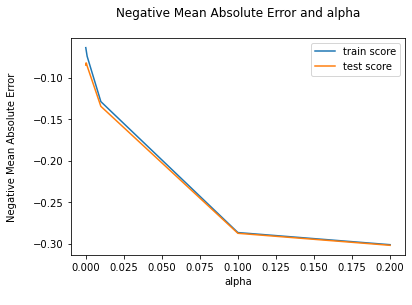

In [135]:
# visualizing the mean train scores and mean test scores with respect to the lambda value

lasso_df['param_alpha'] = lasso_df['param_alpha'].astype('float32')


plt.plot(lasso_df['param_alpha'], lasso_df['mean_train_score'])
plt.plot(lasso_df['param_alpha'], lasso_df['mean_test_score'])

plt.xlabel('alpha\n')
plt.ylabel('Negative Mean Absolute Error\n')

plt.title("Negative Mean Absolute Error and alpha\n")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

- As the lambda value increases the Negative mean Absolute error decreases, The negative error as close to 0 should be maintained

##### Developing Lasso Regression with the optimal value of lambda as 0.0004

In [136]:
lasso = Lasso(alpha = 0.0003)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0003)

In [137]:
lasso_coef_df = pd.DataFrame(X_train.columns, columns = ["Variable Name"])
lasso_coef_df["Lasso Coefficients"] = lasso.coef_
lasso_coef_df["Lasso Coefficients"] = round(lasso_coef_df["Lasso Coefficients"], 3)

lasso_coef_df.sort_values(by = "Lasso Coefficients", ascending = False)

,Variable Name,Lasso Coefficients
9,GrLivArea,0.743
6,TotalBsmtSF,0.416
1,LotArea,0.283
99,OverallQual_10,0.197
98,OverallQual_9,0.195
15,GarageArea,0.132
198,SaleType_New,0.126
58,Neighborhood_Crawfor,0.126
97,OverallQual_8,0.104
38,MSZoning_FV,0.103


- As Lasso Regression implies penalty and tend towards 0 and it can reach exactly to 0 when the variable has really high coefficient (provided the optimum lambda value), Thus Lasso Regression provides us the most needed Feature Selection.
- The variables which have 0 as their coefficients can be omitted in the final model.
- So the Price of the Dwelling is dependent on the variables which has coefficients other than 0

In [138]:
lasso_df = lasso_coef_df[lasso_coef_df["Lasso Coefficients"] > 0]
lasso_df.reset_index(inplace = True)
lasso_df

,index,Variable Name,Lasso Coefficients
0,1,LotArea,0.283
1,3,BsmtFinSF1,0.097
2,4,BsmtFinSF2,0.016
3,6,TotalBsmtSF,0.416
4,7,2ndFlrSF,0.039
5,9,GrLivArea,0.743
6,10,BsmtFullBath,0.048
7,11,FullBath,0.050
8,12,HalfBath,0.051
9,13,BedroomAbvGr,0.019


- **These Variables are the final variables in the Lasso Regression Model through which the price of the Dwelling can be predicted fairly.**
- **The Company can rely upon these predictors for deciding the price of the Dwelling in the Austrailan Market and can imply them for the growth of their market**

In [139]:
# Predicting the value using the Lasso Regression

lasso_y_train_pred = lasso.predict(X_train)

In [140]:
# Evaluating the Lasso Regression Model in train dataset

print("r2 value -->", r2_score(y_train, lasso_y_train_pred))
print("RMSE value -->", mean_squared_error(y_train, lasso_y_train_pred))

r2 value --> 0.935334300354928
RMSE value --> 0.009537594521747463


- RMSE value indicates the predicted model can vary only upto a value of 0.0095 either positively or negatively, which is really a good for a Model

#### Predicting using Lasso Regression

In [141]:
# Predicting the value using the Lasso Regression

lasso_y_test_pred = lasso.predict(X_test)

In [142]:
# Evaluating the Ridge Regression Model

print("r2 value -->", r2_score(y_test, lasso_y_test_pred))
print("RMSE value -->", mean_squared_error(y_test, lasso_y_test_pred))

r2 value --> 0.8638292169728703
RMSE value --> 0.021678195760295327


- RMSE value indicates the predicted model can vary only upto a value of 0.021 either positively or negatively, which is really a good for a Model

### Evaluation results b/w Ridge and Lasso Regression

In [143]:
print("Ridge train r2 value -->", r2_score(y_train, ridge_y_train_pred))
print("Ridge train RMSE value -->", mean_squared_error(y_train, ridge_y_train_pred), "\n")

print("Ridge test r2 value -->", r2_score(y_test, ridge_y_test_pred))
print("Ridge test RMSE value -->", mean_squared_error(y_test, ridge_y_test_pred))

Ridge train r2 value --> 0.9355740554158566
Ridge train RMSE value --> 0.00950223286064701 

Ridge test r2 value --> 0.8724291442717493
Ridge test RMSE value --> 0.020309099516850327


In [144]:
print("Lasso train r2 value -->", r2_score(y_train, lasso_y_train_pred))
print("Lasso train RMSE value -->", mean_squared_error(y_train, lasso_y_train_pred), "\n")

print("Lasso test r2 value -->", r2_score(y_test, lasso_y_test_pred))
print("Lasso test RMSE value -->", mean_squared_error(y_test, lasso_y_test_pred))

Lasso train r2 value --> 0.935334300354928
Lasso train RMSE value --> 0.009537594521747463 

Lasso test r2 value --> 0.8638292169728703
Lasso test RMSE value --> 0.021678195760295327


- **Though Both the Ridge and Lasso Regression gave very similar train and test scores, I personally choose Lasso Regression as final Model, Reason being Lasso Regression gave me the option of Feature Selection Automatically by giving penalty to unwanted variables, thus my final model only uses 67 variables out of 203 variables, which makes my model computationally very lite as well as increased my model performance significantly.**
